# Mathematical Insights

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from optimask import OptiMask
from optimask.utils import generate_mar, plot

## 1. OptiMask API

OptiMask is easy to use. It can be applied to NumPy arrays or pandas DataFrames, returning a subarray or subframe without NaN or the retained rows/columns. Since multiple optimizations are carried out starting from random states, a `random_state` parameter is provided for reproducibility.

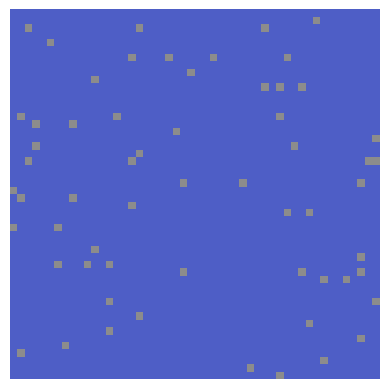

In [2]:
x = generate_mar(m=50, n=50, ratio=0.025)
plot(x)

In [3]:
%time rows, cols = OptiMask(random_state=0).solve(x)
len(rows), len(cols), np.any(np.isnan(x[rows][:, cols]))

CPU times: total: 3.02 s
Wall time: 4.91 s


(34, 33, False)

In red the removed rows and columns, in blue the remaining submatrix without NaN:

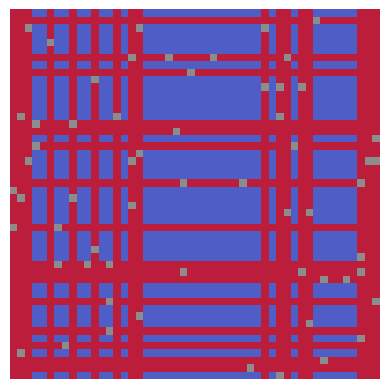

In [4]:
plot(x, rows_to_keep=rows, cols_to_keep=cols)

OptiMask can directly return the submatrix:

In [5]:
xt = OptiMask(random_state=0).solve(x, return_data=True)
xt.shape, np.any(np.isnan(xt))

((34, 33), False)

OptiMask offers a verbose mode to inspect the results of the intermediate optimizations:

In [6]:
xt = OptiMask(random_state=0, verbose=True).solve(x, return_data=True)
xt.shape, np.any(np.isnan(xt))

	Trial 1 : submatrix of size 29x38 (1102 elements) found.
	Trial 2 : submatrix of size 30x37 (1110 elements) found.
	Trial 3 : submatrix of size 37x30 (1110 elements) found.
	Trial 4 : submatrix of size 28x39 (1092 elements) found.
	Trial 5 : submatrix of size 34x33 (1122 elements) found.
Result: the largest submatrix found is of size 34x33 (1122 elements) found.


((34, 33), False)

OptiMask provides a n_tries parameter, which enhances the probability of finding a better solution:

In [7]:
%time xt = OptiMask(n_tries=35, random_state=0, verbose=True).solve(x, return_data=True)
xt.shape, np.any(np.isnan(xt))

CPU times: total: 203 ms
Wall time: 17.8 ms


	Trial 6 : submatrix of size 31x36 (1116 elements) found.
	Trial 7 : submatrix of size 37x29 (1073 elements) found.
	Trial 8 : submatrix of size 36x30 (1080 elements) found.
	Trial 9 : submatrix of size 29x36 (1044 elements) found.
	Trial 10 : submatrix of size 29x37 (1073 elements) found.
	Trial 11 : submatrix of size 34x32 (1088 elements) found.
	Trial 12 : submatrix of size 34x33 (1122 elements) found.
	Trial 13 : submatrix of size 32x35 (1120 elements) found.
	Trial 14 : submatrix of size 35x32 (1120 elements) found.
	Trial 15 : submatrix of size 31x37 (1147 elements) found.
	Trial 16 : submatrix of size 35x32 (1120 elements) found.
	Trial 17 : submatrix of size 34x33 (1122 elements) found.
	Trial 18 : submatrix of size 37x31 (1147 elements) found.
	Trial 19 : submatrix of size 38x29 (1102 elements) found.
	Trial 20 : submatrix of size 31x36 (1116 elements) found.
	Trial 21 : submatrix of size 31x35 (1085 elements) found.
	Trial 22 : submatrix of size 33x33 (1089 elements) found.
	

((34, 34), False)

OptiMask can also handle pandas DataFrames:

In [8]:
df = pd.DataFrame(x, columns=[f'feature {k}' for k in range(x.shape[1])])
df.sample(3)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 40,feature 41,feature 42,feature 43,feature 44,feature 45,feature 46,feature 47,feature 48,feature 49
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature 0   48 non-null     float64
 1   feature 1   47 non-null     float64
 2   feature 2   48 non-null     float64
 3   feature 3   48 non-null     float64
 4   feature 4   50 non-null     float64
 5   feature 5   49 non-null     float64
 6   feature 6   48 non-null     float64
 7   feature 7   49 non-null     float64
 8   feature 8   48 non-null     float64
 9   feature 9   50 non-null     float64
 10  feature 10  49 non-null     float64
 11  feature 11  48 non-null     float64
 12  feature 12  50 non-null     float64
 13  feature 13  47 non-null     float64
 14  feature 14  49 non-null     float64
 15  feature 15  50 non-null     float64
 16  feature 16  47 non-null     float64
 17  feature 17  47 non-null     float64
 18  feature 18  50 non-null     float64
 19  feature 19  50 non-null     flo

In [10]:
dft = OptiMask(n_tries=35).solve(df, return_data=True)
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 49
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature 2   34 non-null     float64
 1   feature 3   34 non-null     float64
 2   feature 4   34 non-null     float64
 3   feature 6   34 non-null     float64
 4   feature 9   34 non-null     float64
 5   feature 10  34 non-null     float64
 6   feature 12  34 non-null     float64
 7   feature 14  34 non-null     float64
 8   feature 15  34 non-null     float64
 9   feature 18  34 non-null     float64
 10  feature 19  34 non-null     float64
 11  feature 20  34 non-null     float64
 12  feature 21  34 non-null     float64
 13  feature 23  34 non-null     float64
 14  feature 25  34 non-null     float64
 15  feature 26  34 non-null     float64
 16  feature 27  34 non-null     float64
 17  feature 28  34 non-null     float64
 18  feature 29  34 non-null     float64
 19  feature 30  34 non-null     float64


In [11]:
index, columns = OptiMask(n_tries=35).solve(df)
index, columns

(Index([ 0,  3,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46,
        48, 49],
       dtype='int64'),
 Index(['feature 2', 'feature 4', 'feature 5', 'feature 7', 'feature 9',
        'feature 12', 'feature 15', 'feature 18', 'feature 19', 'feature 20',
        'feature 21', 'feature 23', 'feature 25', 'feature 26', 'feature 27',
        'feature 28', 'feature 29', 'feature 30', 'feature 31', 'feature 32',
        'feature 33', 'feature 34', 'feature 35', 'feature 38', 'feature 39',
        'feature 42', 'feature 43', 'feature 44', 'feature 45', 'feature 46',
        'feature 48'],
       dtype='object'))

## 2. Understanding the problem at hand

In the context of a matrix containing a lone NaN cell, the central challenge emerges: determining whether to eliminate the corresponding row or column. This decision is readily resolved by examining the matrix's shape. Specifically, if the matrix has a greater number of rows than columns, the optimal approach involves removing the associated row. Conversely, when the matrix has more columns than rows, the most effective course of action is to eliminate the corresponding column:

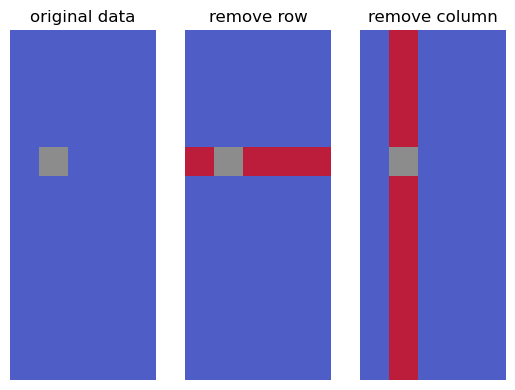

In [12]:
x = np.zeros((12, 5))
x[7, 1] = np.nan

plt.figure()
plt.subplot(1, 3, 1)
plot(x, show=False, title='original data')
plt.subplot(1, 3, 2)
plot(x, rows_to_remove=[7], show=False, title='remove row')
plt.subplot(1, 3, 3)
plot(x, cols_to_remove=[1], show=False, title='remove column')
plt.show()

Eliminating the highlighted row yields the most extensive submatrix devoid of NaN. This solution remains optimal even when additional NaN values are present within the same row:

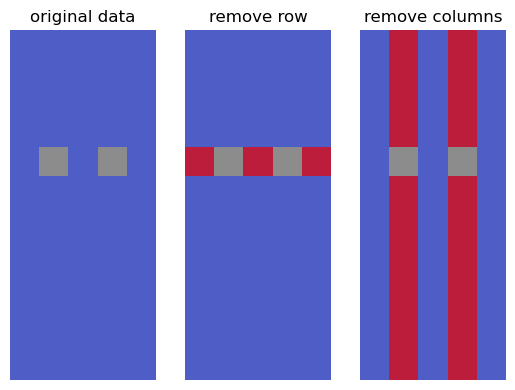

In [13]:
x = np.zeros((12, 5))
x[7, [1, 3]] = np.nan

plt.figure()
plt.subplot(1, 3, 1)
plot(x, show=False, title='original data')
plt.subplot(1, 3, 2)
plot(x, rows_to_remove=[7], show=False, title='remove row')
plt.subplot(1, 3, 3)
plot(x, cols_to_remove=[1, 3], show=False, title='remove columns')
plt.show()

But what about more complex cases ? 

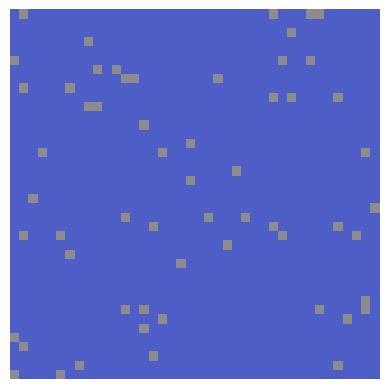

In [14]:
m, n = 40, 40
ratio = 0.03
x = generate_mar(m, n, ratio)

plot(x)

## 3. The Problem from an Optimization Perspective

This problem can be formalized as a binary optimization problem in two ways.

### 3.1. Linear programming

Source : [this mathematica.stackexchange answer](https://mathematica.stackexchange.com/a/108513/92680), posted by [unlikely](https://mathematica.stackexchange.com/users/16267/unlikely).

Given:

- Matrix $A$ of shape $m \times n$ and elements $a_{i,j}$
- The goal is to determine the values of variables $(i \in [1~..~m]$, $j \in [1~..~n])$:
  - $e_{i,j} \in \{0,1\}$ (1 if element $(i,j)$ should be removed, 0 otherwise)
  - $r_i \in \{0,1\}$ (1 if row $i$ should be removed, 0 otherwise)
  - $c_j \in \{0,1\}$ (1 if column $j$ should be removed, 0 otherwise)



Subject to:


- $e_{i,j} = 1$ for every $(i,j)$ such that $a_{i,j}$ is a NaN
- $r_i + c_j \geq e_{i,j}$, meaning if $e_{i,j} = 1$ then either $r_i = 1$ or $c_j = 1$, or both
- $e_{i,j} \geq r_i$, indicating if $r_i = 1$ then $e_{i,j}$ must be 1
- $e_{i,j} \geq c_j$, indicating if $c_j = 1$ then $e_{i,j}$ must be 1

The objective is to minimize the total number of deleted cells:

$$\sum_{i=1}^{m} \sum_{j=1}^{n} e_{i,j}$$

The optimal values of $r_i$ and $c_j$ provide us with the specific rows and columns to remove, ensuring that the remaining matrix is efficiently processed and devoid of NaN values. This problem can be solved in Python using the usual tools of linear programming, such as combining Pyomo with GLPK. Its disadvantage is being relatively expensive, as for an $m \times n$ matrix, more than $m \times n$ (binary) variables are used.

CPU times: total: 188 ms
Wall time: 3min 30s


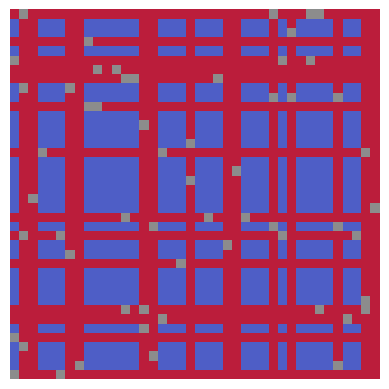

The largest submatrix without NaN is of size 26x26 (676 elements among 1156)


In [15]:
from pyomo.environ import Binary, ConcreteModel, ConstraintList, Objective, SolverFactory, Var, minimize


def linear_programming(matrix):
    m, n = matrix.shape
    model = ConcreteModel()

    # Variables
    model.e = Var(range(1, m + 1), range(1, n + 1), within=Binary)
    model.r = Var(range(1, m + 1), within=Binary)
    model.c = Var(range(1, n + 1), within=Binary)

    # Objective
    model.obj = Objective(expr=sum(model.e[i, j] for i in range(1, m + 1) for j in range(1, n + 1)), sense=minimize)

    # Constraints
    positions = [(i, j) for i in range(1, m + 1) for j in range(1, n + 1)]
    nan_positions = [(i, j) for (i, j) in positions if np.isnan(matrix[i - 1, j - 1])]

    model.nan_constraints = ConstraintList()
    for i, j in nan_positions:
        model.nan_constraints.add(model.e[i, j] == 1)

    model.other_constraints = ConstraintList()
    for i, j in positions:
        model.other_constraints.add(model.r[i] + model.c[j] >= model.e[i, j])
        model.other_constraints.add(model.e[i, j] >= model.r[i])
        model.other_constraints.add(model.e[i, j] >= model.c[j])

    # Solve the model
    solver = SolverFactory('glpk')
    solver.solve(model)

    # Extract the results
    rows_to_keep = [i-1 for i in range(1, m + 1) if model.r[i].value == 0]
    cols_to_keep = [j-1 for j in range(1, n + 1) if model.c[j].value == 0]

    return rows_to_keep, cols_to_keep


%time rows, cols = linear_programming(x)

plot(x, rows_to_keep=rows, cols_to_keep=cols)
print(f"The largest submatrix without NaN is of size {len(rows)}x{len(cols)} ({len(rows)*len(cols)} elements among {xt.size})")

Although producing the optimal solution, this approach becomes intractable for large-sized matrices.

### 3.2. Quadratic Programming

By employing the variables mentioned earlier, an alternate perspective of the problem involves maximizing $$(m-\sum_{i=1}^m r_i) \times (n-\sum_{i=1}^n c_j)$$
while considering:
- $r_i + c_j \ge 1$ for each $(i,j)$ where $a_{i,j}$ is a NaN.

Although the number of variables is reduced, the optimization problem becomes more challenging.

## 4. OptiMask
### 4.1. The algorithm

OptiMask's algorithm aims to identify the optimal set of rows and columns for removal, maximizing the size of the submatrix without NaN values. Notably, a formal proof of convergence for this algorithm is currently *unavailable*.

The algorithm iteratively computes permutations of rows and columns until a specific convergence criterion is met. This criterion relies on detecting a contiguous and well-ordered NaN frontier, similar to a **Pareto efficiency frontier**. Once identified, the problem simplifies to finding the largest contiguous rectangle, a computationally straightforward task. The stored permutations help pinpoint the rows and columns to be removed.

OptiMask's algorithm is heuristic, introducing uncertainty compared to a linear programming approach. To increase the likelihood of an optimal solution, the algorithm undergoes multiple optimizations through repeated restarts with random permutations. The `n_tries` parameter controls the number of restarts, while the random_state parameter ensures reproducibility.

Let `x` represent the array with missing values to be processed:

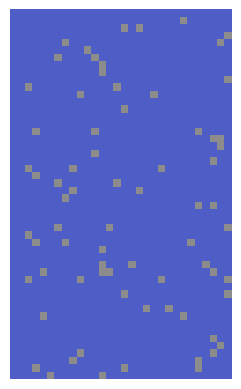

In [16]:
x = generate_mar(m=50, n=30, ratio=0.05)
plot(x)

The first step is to isolate the rows and columns with at least one NaN value. We know that the rows or columns with zero NaN values will necessarily be part of the sought submatrix. Now we work with a boolean matrix, which is set to True at the NaN cells of the original data. We introduce `hx` and `hy`, representing the indices of the highest True in each column and the indices of the rightmost True in each row, respectively.

In [17]:
def heights(x, axis=0):
    return (x.shape[axis] - np.argmax(np.flip(x, axis=axis), axis=axis)).astype(np.uint32)

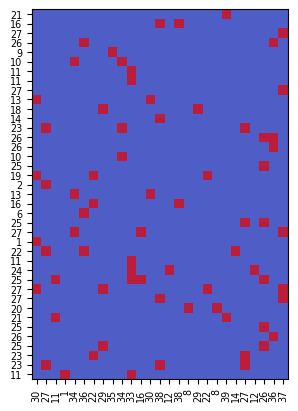

In [18]:
nan_rows, nan_cols = np.isnan(x).nonzero()
nan_rows, nan_cols = np.unique(nan_rows), np.unique(nan_cols)
xp = np.isnan(x[nan_rows][:, nan_cols])
hx, hy = heights(xp, axis=0), heights(xp, axis=1)
plot(xp, xticks=hx, yticks=hy)

The algorithm's core involves computing a series of permutations with the objective of ordering `hx` and `hy` to establish a Pareto frontier of NaN. This implies that both `hx` and `hy` should exhibit a decreasing trend. Importantly, at each step, the algorithm performs a permutation to order `hx`, followed by a permutation to order `hy`, and then alternates back and forth between `hx` and `hy` until both sequences exhibit a decreasing order.

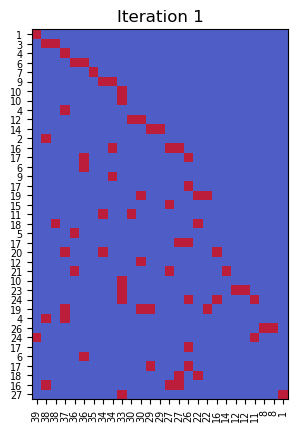

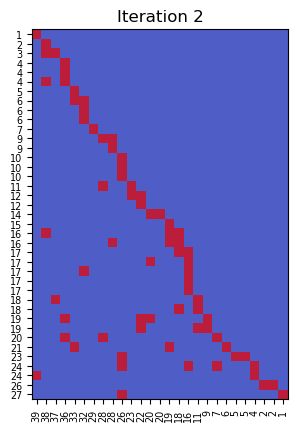

In [19]:
hx, hy = heights(xp, axis=0).astype(np.uint32), heights(xp, axis=1).astype(np.uint32)
k = 0
while not (OptiMask.is_decreasing(hx) and OptiMask.is_decreasing(hy)):
    axis = (k % 2)
    p_step = np.argsort(-heights(xp, axis=axis))
    if axis == 0:
        xp = xp[:, p_step]
    if axis == 1:
        xp = xp[p_step]
    hx, hy = heights(xp, axis=0).astype(np.uint32), heights(xp, axis=1).astype(np.uint32)
    plot(xp, xticks=hx, yticks=hy, title=f'Iteration {k+1}')
    k += 1

Then, we can now seek the largest **contiguous rectangle** starting from the **upper right** of the matrix (without forgetting the rows and columns without NaN, not displayed here). Since we have kept track of the successive permutations, both over rows and columns, the algorithm can return the rows and columns to remove (or keep).

This computation is performed `n_tries` times over a copy of the matrix to process, where its rows and columns are each time randomly permuted. Each iteration results in a different NaN frontier and a different set of rows and columns to remove. After the `n_tries` computations, the set that leads to the largest submatrix without NaN is retained. Therefore, increasing n_tries leads to better results, and it may even reach the optimal one.

### 4.2. `n_tries` influence on the quality of the solution

Given an `m`x`n` matrix with missing values occurring at a random frequency of `ratio`, how does increasing `n_tries` influence the size of the computed submatrix?

In [20]:
def convergence_plot(m, n, ratio, n_tries, n_permutations=1000):
    def cummax(arr): return np.maximum.accumulate(arr)

    x = generate_mar(m, n, ratio)
    opt_rows, opt_cols = linear_programming(x)
    opt_size = len(opt_rows) * len(opt_cols)

    optimask = OptiMask(n_tries=1)

    ret = np.zeros(n_tries)
    for k in range(n_tries):
        rows, cols = optimask.solve(x)
        ret[k] = len(rows) * len(cols)

    ret_mean = np.zeros_like(ret, dtype=float)

    plt.figure(figsize=(8, 3))
    for _ in range(n_permutations):
        ret_iter = cummax(ret[np.random.permutation(len(ret))])
        plt.plot(ret_iter, c='grey', lw=0.05)
        ret_mean += ret_iter / n_permutations
    plt.plot(ret_mean, c='k', lw=2)
    plt.axhline(y=opt_size, c='r', linestyle='dashed')
    plt.xlabel('number of random restarts')
    plt.ylabel('size of the solution')
    plt.title("Effect of Randomized Restarts on Heuristic Solution Quality")
    plt.xlim(0, n_tries)
    plt.text(x=1.025*n_tries, y=opt_size, s='size of the optimal solution', c='r')
    plt.show()

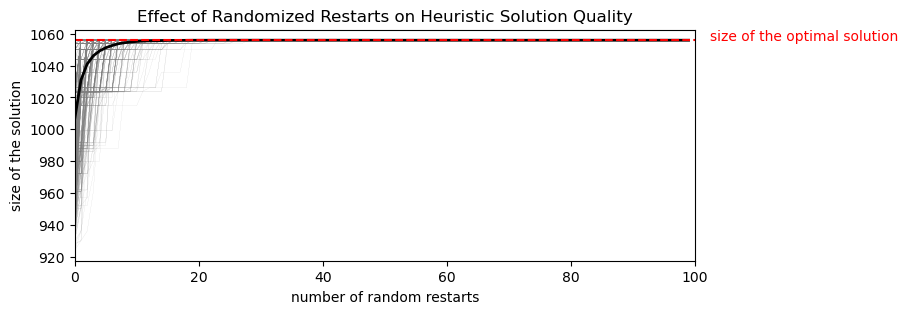

In [21]:
convergence_plot(m=40, n=40, ratio=0.025, n_tries=100)

### 4.3. What about structured NaN patterns ?

OptiMask is also efficient on structured NaN patterns (the largest submatrix found is in blue, the removed cells are in red):

In [22]:
def solve_and_plot(x):
    rows, cols = OptiMask().solve(x)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot(x, show=False)
    plt.subplot(1, 2, 2)
    plot(x, rows_to_keep=rows, cols_to_keep=cols)
    plt.show()

In [23]:
n = 31

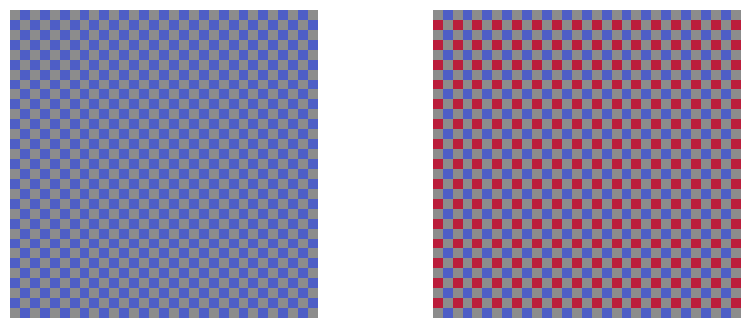

In [24]:
x = np.zeros((n, n))
iy, ix = np.indices(x.shape)
x[np.mod(iy+ix, 2) == 0] = np.nan
solve_and_plot(x)

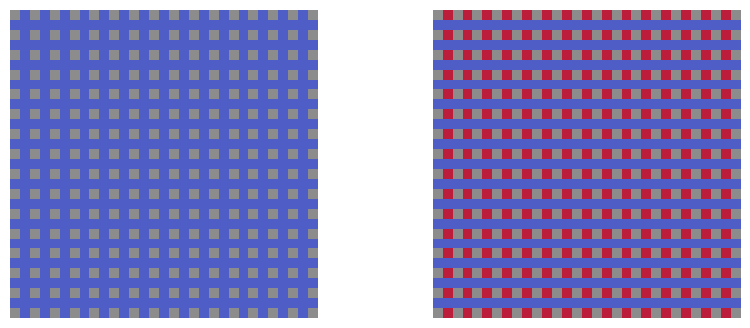

In [25]:
x = np.zeros((n, n))
iy, ix = np.indices(x.shape)
x[(np.mod(ix, 2) == 0) & (np.mod(iy, 2) == 0)] = np.nan
solve_and_plot(x)

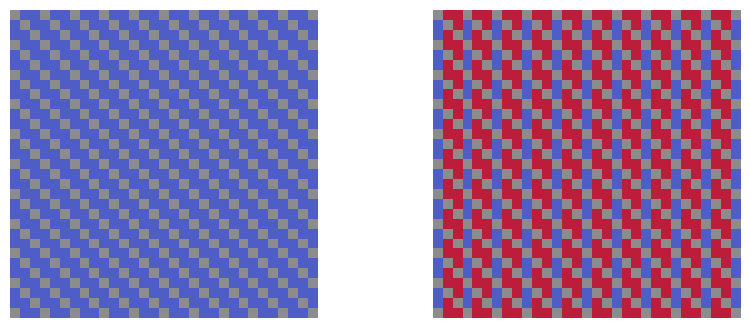

In [26]:
x = np.zeros((n, n))
iy, ix = np.indices(x.shape)
x[np.mod(iy+ix, 3) == 0] = np.nan
solve_and_plot(x)

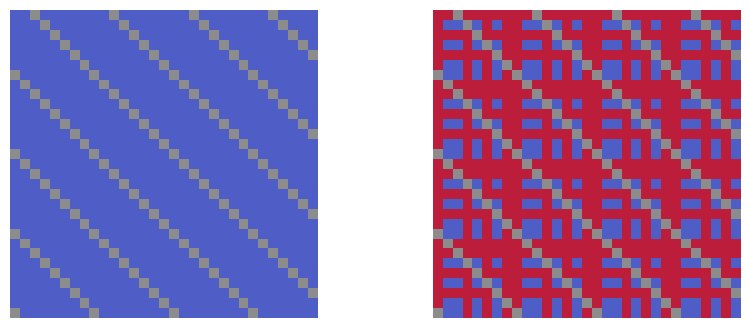

In [27]:
x = np.zeros((n, n))
iy, ix = np.indices(x.shape)
x[np.mod(iy+ix, 8) == 0] = np.nan
solve_and_plot(x)

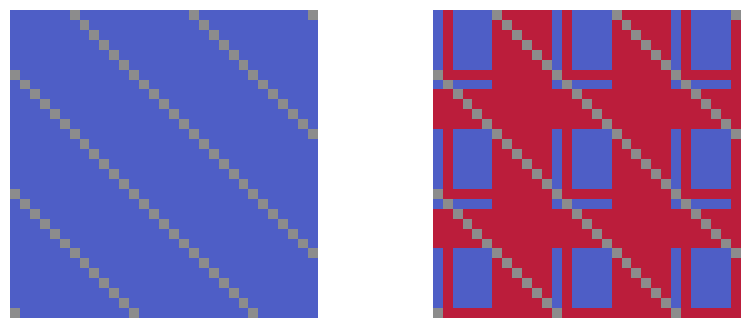

In [28]:
x = np.zeros((n, n))
iy, ix = np.indices(x.shape)
x[np.mod(iy+ix, 12) == 0] = np.nan
solve_and_plot(x)

### 4.4. Dealing with large matrices

``OptiMask`` can efficiently handle large matrices within a reasonable amount of time. Its time complexity is proportional to the number of NaN cells, and the number `n_tries`.

In [29]:
x = generate_mar(m=10_000, n=100, ratio=0.02)
%time rows, cols = OptiMask().solve(x)
np.isnan(x[rows][:, cols]).any()

CPU times: total: 0 ns
Wall time: 15.7 ms


False

In [30]:
x = generate_mar(m=1_000, n=1_000, ratio=0.02)
%time rows, cols = OptiMask().solve(x)
np.isnan(x[rows][:, cols]).any()

CPU times: total: 15.6 ms
Wall time: 15.6 ms


False

In [31]:
x = generate_mar(m=100_000, n=1_000, ratio=0.02)
%timeit rows, cols = OptiMask().solve(x)

259 ms ± 7.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
rows, cols = OptiMask(n_tries=25, verbose=True).solve(x)

	Trial 1 : submatrix of size 36314x50 (1815700 elements) found.
	Trial 2 : submatrix of size 34893x52 (1814436 elements) found.
	Trial 3 : submatrix of size 35796x51 (1825596 elements) found.
	Trial 4 : submatrix of size 36431x50 (1821550 elements) found.
	Trial 5 : submatrix of size 37212x49 (1823388 elements) found.
	Trial 6 : submatrix of size 36112x50 (1805600 elements) found.
	Trial 7 : submatrix of size 37027x49 (1814323 elements) found.
	Trial 8 : submatrix of size 36395x50 (1819750 elements) found.
	Trial 9 : submatrix of size 36597x50 (1829850 elements) found.
	Trial 10 : submatrix of size 36770x50 (1838500 elements) found.
	Trial 11 : submatrix of size 38846x47 (1825762 elements) found.
	Trial 12 : submatrix of size 37027x49 (1814323 elements) found.
	Trial 13 : submatrix of size 37181x49 (1821869 elements) found.
	Trial 14 : submatrix of size 37227x49 (1824123 elements) found.
	Trial 15 : submatrix of size 36278x50 (1813900 elements) found.
	Trial 16 : submatrix of size 3647